## Problem 3: How many people live near shopping centers? (8 points)

In the last step of this analysis, use a *spatial join* to relate data from a population grid data set to the buffer layer created in *problem 2* to find out how many people live in all population grid cells that are **within** 1.5 km distance from each shopping centre. 

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS).


*Feel free to divide your solution into more codeblocks than prepared! Remember to add comments to your code :)*

### a) Load the population grid data set and the buffer geometries

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS). Load the data into a `GeoDataFrame` called `population_grid`.

(optional) If you want, discard unneeded columns and translate the remaining column names from Finnish to English.

In [3]:
# ADD YOUR OWN CODE HERE
import geopandas
population_grid = geopandas.read_file(
    (
        "https://kartta.hsy.fi/geoserver/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020"
        "&srsName=EPSG:3879"
    ),
)
population_grid.crs = crs="EPSG:3879"

In [4]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
import pyproj

assert isinstance(population_grid, geopandas.GeoDataFrame)
assert population_grid.crs == pyproj.CRS("EPSG:3879")



Load the buffers computed in *problem 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Add an `assert` statement to check whether the two data frames are in the same CRS.

In [5]:
# ADD YOUR OWN CODE HERE
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH/ "Data"
shopping_centre_buffers = geopandas.read_file(DATA_DIRECTORY/"buffers.gpkg")

In [6]:
shopping_centre_buffers

,address,id,name,addr,geometry
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,"Salaattiasema, 14-20, Mannerheimintie, Keskust...",2,Forum shopping centre,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25498073.542 6672878.360, 25498066.3..."
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",3,ISo-Omena shopping centre,"Piispansilta 11,02230 Espoo, Finland","POLYGON ((25486970.435 6672070.967, 25486963.2..."
3,"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",4,Sello shopping centre,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25490991.076 6678322.265, 25490983.8..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",5,Jumbo shopping centre,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"Silta, 5, Hermannin rantatie, Verkkosaari, Kal...",6,REDI shopping centre,"Hermannin rantatie 5, 00580 Helsinki, Finland","POLYGON ((25500337.156 6674909.983, 25500329.9..."
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",7,Tripla shopping centre,"Fredikanterassi 1, 00520 Helsinki, Finland","POLYGON ((25497631.583 6676185.929, 25497624.3..."


In [21]:
population_grid.head(5)

,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2020.1,703,5,51,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,Vaestotietoruudukko_2020.2,710,8,44,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,Vaestotietoruudukko_2020.3,711,5,90,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,Vaestotietoruudukko_2020.4,715,13,34,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,Vaestotietoruudukko_2020.5,848,5,53,99,99,99,99,99,99,99,99,99,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


<AxesSubplot: >

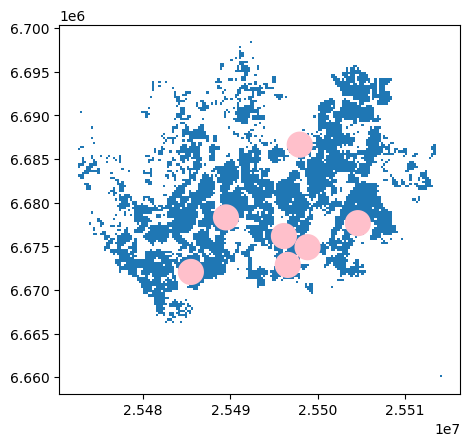

In [8]:
ax = population_grid.plot()
shopping_centre_buffers.plot(ax=ax, color = "pink", legend = True)

In [9]:
assert shopping_centre_buffers.crs == population_grid.crs 

In [10]:
import rtree
import pygeos

In [11]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert isinstance(shopping_centre_buffers, geopandas.GeoDataFrame)
assert shopping_centre_buffers.geometry.geom_type.unique() == ["Polygon"]
assert shopping_centre_buffers.crs == pyproj.CRS("EPSG:3879")

In [12]:
pip install pygeos

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



---

### b) Carry out a *spatial join* between the `population_grid` and the `shopping_centre_buffers`

Join the shopping centre’s `id` column (and others, if you want) to the population grid data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins). 


In [25]:
# ADD YOUR OWN CODE HERE
# we would do a spatial join between a geoseries and a geodataframe
import pygeos
import rtree
shopping_centre_buffers.set_geometry = "id"
shopping_centres_population = shopping_centre_buffers.sjoin(population_grid, how="left", predicate='intersects')

In [26]:
shopping_centres_population.head(3)

,address,id,name,addr,geometry,index_right,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3...",5172,Vaestotietoruudukko_2020.5173,21802,12,86,99,99,99,99,99,99,99,99,99
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3...",5232,Vaestotietoruudukko_2020.5233,21963,63,68,99,99,99,99,99,99,99,99,99
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3...",5171,Vaestotietoruudukko_2020.5172,21801,142,76,4,24,9,5,17,37,17,18,11



---

### c) Compute the population sum around shopping centres

Group the resulting (joint) data frame by shopping centre (`id` or `name`), and calculate the `sum()` of the population living inside the 1.5 km radius around them.

Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

In [30]:
# ADD YOUR OWN CODE HERE
grouped = shopping_centres_population.groupby("name")

In [36]:
grouped.get_group("Itis shopping centre").head(3)

,address,id,name,addr,geometry,index_right,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3...",5172,Vaestotietoruudukko_2020.5173,21802,12,86,99,99,99,99,99,99,99,99,99
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3...",5232,Vaestotietoruudukko_2020.5233,21963,63,68,99,99,99,99,99,99,99,99,99
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3...",5171,Vaestotietoruudukko_2020.5172,21801,142,76,4,24,9,5,17,37,17,18,11


In [37]:
grouped.sum("asukkaita")

,id,index_right,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
name,,,,,,,,,,,,,,
Forum shopping centre,222,382687,1807943,79270,4659,7684,7139,17957,16656,12230,10924,9183,8911,4854
ISo-Omena shopping centre,342,162724,1045226,34441,4606,5597,5387,7160,7878,6202,5772,5299,5304,3445
Itis shopping centre,108,544961,2320145,29188,4338,5345,5048,5758,6543,5662,5990,5333,4735,3958
Jumbo shopping centre,255,185471,871112,11449,1863,3789,3576,3726,4329,4015,3352,2751,2527,2261
REDI shopping centre,378,237476,1103816,44277,2434,3840,2960,12154,12134,6625,5257,4498,3745,2329
Sello shopping centre,404,219376,1179010,31345,3657,6667,5864,9137,9214,6884,6117,5509,4957,3972
Tripla shopping centre,609,293477,1393401,44164,2536,4656,3814,11328,11506,6841,5742,5227,4687,3121



---

### d) Reflection

Good job! You are almost done with this week’s exercise. Please quickly answer the following short questions:
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

Add your answers in a new *Markdown* cell below: